In [120]:
import pandas as pd
import numpy as np


In [121]:
users = pd.read_csv("takehome_users.csv", encoding='latin-1')
userengagement = pd.read_csv("takehome_user_engagement.csv", encoding='latin-1')

In [122]:
display(users)

users.describe()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [123]:
users =users.rename(columns={'object_id':'user_id'})

In [124]:
users.dtypes



user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [125]:
display(userengagement)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [126]:
userengagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [127]:
userengagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [128]:
merged = users.merge(userengagement, how='inner', on='user_id')

In [129]:
display(merged)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1
...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15,1
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013-01-15 18:28:37,1
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16,1
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012-06-02 11:55:59,1


In [130]:
mostengagedusers = merged.groupby(['name', 'email']).visited.count().sort_values(ascending=False).head(20)
display(mostengagedusers) ### can use this for e-mail list

name                email                               
Melo Vitória        VitoriaAlvesMelo@jourrapide.com         606
Becker Jessika      JessikaBecker@gmail.com                 600
Carvalho Eduardo    EduardoCunhaCarvalho@gmail.com          593
Ferreira Rebeca     ffickuvv@qqgix.com                      590
McCoy Donna         DonnaBMcCoy@hotmail.com                 585
Molloy Alex         AlexMolloy@yahoo.com                    581
Schmidt Johan       JohanNSchmidt@cuvox.de                  580
Outtrim Gemma       GemmaOuttrim@jourrapide.com             566
Kranewitter Elijah  ElijahKranewitter@gmail.com             547
Herzog Benjamin     BenjaminHerzog@gustr.com                545
Oliveira Isabela    IsabelaCastroOliveira@gmail.com         541
Grunewald Tom       TomGrunewald@yahoo.com                  538
Fernandes Lavinia   LaviniaAlvesFernandes@jourrapide.com    526
Bowen Alisha        AlishaBowen@gustr.com                   521
Hanson Mohammed     hrpwoegq@nrwjd.com         

Text(0.5, 1.0, 'Total Visits by User')

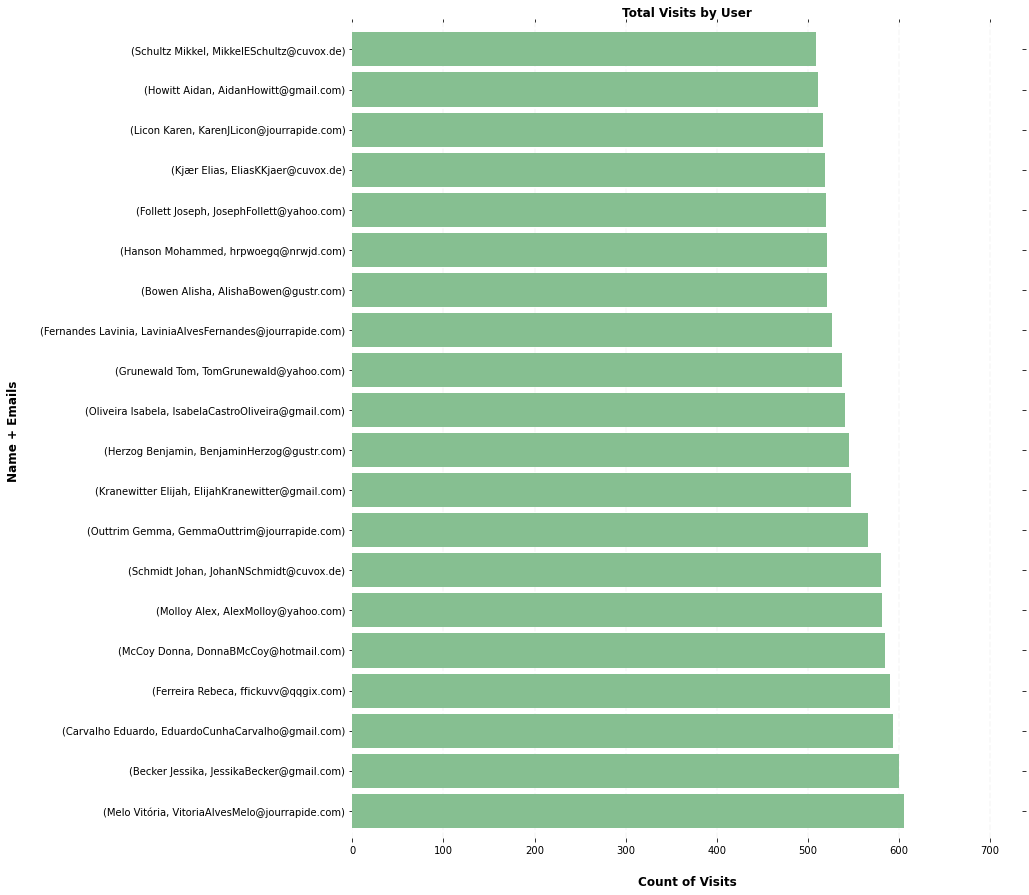

In [131]:
ax = mostengagedusers.plot(kind='barh', figsize=(12, 15), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Count of Visits", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Name + Emails", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title("Total Visits by User", weight='bold', size=12)

### Finding Adopted Users 

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption

In [132]:
merged = merged.set_index('time_stamp')



In [133]:
merged.index = pd.to_datetime(merged.index)

In [134]:
display(merged)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
time_stamp,,,,,,,,,,,
2014-04-22 03:53:30,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
2013-11-15 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2013-11-29 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2013-12-09 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2013-12-25 03:45:04,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2013-09-06 06:14:15,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1
2013-01-15 18:28:37,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1
2014-04-27 12:45:16,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1


In [135]:
adopted = merged.groupby([merged['name'], merged.index.strftime('%W, %d')]).visited.sum().reset_index() ## grouping by week, day, and name & summing visits

In [136]:
pd.set_option('display.max_rows', 500)

display(adopted.head(500))

adopted['time_stamp'] = adopted['time_stamp'].astype('string')

##time stamp represents week of year, and day of month

,name,time_stamp,visited
0,Aachen Frank,"44, 04",1
1,Aachen Klaus,"48, 03",1
2,Aachen Petra,"20, 23",1
3,Aaron Jai,"27, 14",1
4,Abbott Anna,"43, 24",1
5,Abbott Anna,"43, 28",1
6,Abbott Anna,"46, 13",1
7,Abbott Naomi,"44, 05",1
8,Abbott Rebecca,"00, 03",1
9,Abbott Rebecca,"01, 06",1


In [137]:
### finding names who have 3 or more visits on 3 separate days in a one week period

### Split into Week and Day, group by Week and then filter for >= 3 count for any week.

In [138]:
adopted[['Week', 'Day']] = adopted['time_stamp'].str.split(' ', 1, expand=True)

In [139]:
### Now that we have the group by Week AND Day, (summed) we change counts to 1 to make rows distinct, te

In [140]:
adopted = adopted.groupby(['Week','name']).visited.count().reset_index()

In [141]:
display(adopted.sort_values(by='visited', ascending=False))

,Week,name,visited
55598,"51,",Becker Jessika,13
46785,"42,",Melo Vitória,13
40420,"35,",Rucker Douglas,13
41568,"37,",Becker Jessika,13
51930,"47,",Oliveira Isabela,13
...,...,...,...
30054,"22,",Olsen Tobias,1
30052,"22,",Oliveira Julieta,1
30050,"22,",Oliveira Brenda,1
30049,"22,",Oliveira Beatriz,1


In [142]:
adopted = adopted[adopted['visited'] >= 3]

In [143]:
display(adopted)

,Week,name,visited
2,"00,",Adams Christy,5
6,"00,",Adler Marcel,6
7,"00,",Aguilar Robert,5
12,"00,",Almeida Carlos,4
16,"00,",Almeida Kai,5
...,...,...,...
57400,"52,",Wilkie Alannah,4
57404,"52,",Winter Robert,3
57406,"52,",Winther Maja,4
57408,"52,",Womble Jacob,5


In [144]:
adopted = adopted.drop_duplicates(subset='name')

In [145]:
display(adopted)

,Week,name,visited
2,"00,",Adams Christy,5
6,"00,",Adler Marcel,6
7,"00,",Aguilar Robert,5
12,"00,",Almeida Carlos,4
16,"00,",Almeida Kai,5
...,...,...,...
54889,"50,",Hope Toby,3
54935,"50,",Johnstone Carmen,3
55094,"50,",McKinlay Eliza,3
56298,"51,",Pinto Nicole,4


In [146]:
adoptedandmerged = merged.merge(adopted, how='left', on='name')

In [147]:
display(adoptedandmerged.tail(100))


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited_x,Week,visited_y
207817,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207818,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207819,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207820,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207821,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207822,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207823,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207824,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207825,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0
207826,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,1,"00,",3.0


In [148]:
adoptedandmerged['visited_y']  = adoptedandmerged['visited_y'].astype('float')



In [149]:
display(adoptedandmerged)

adoptedandmerged.dtypes

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited_x,Week,visited_y
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",3.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",3.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",3.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1,NaN,NaN
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1,NaN,NaN
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1,NaN,NaN
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1,NaN,NaN


user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
visited_x                       int64
Week                           object
visited_y                     float64
dtype: object

In [150]:
adoptedandmerged['visited_y'] = (adoptedandmerged['visited_y'] >= 3).astype(int)

In [151]:
display(adoptedandmerged)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited_x,Week,visited_y
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,NaN,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1,NaN,0
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1,NaN,0
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1,NaN,0
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1,NaN,0


In [152]:
final = adoptedandmerged.rename(columns={'visited_y': 'adoptedstatus'})

In [153]:
display(final)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited_x,Week,adoptedstatus
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,NaN,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,"05,",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,1,NaN,0
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1,NaN,0
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,1,NaN,0
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,1,NaN,0


In [154]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Correlation between various features


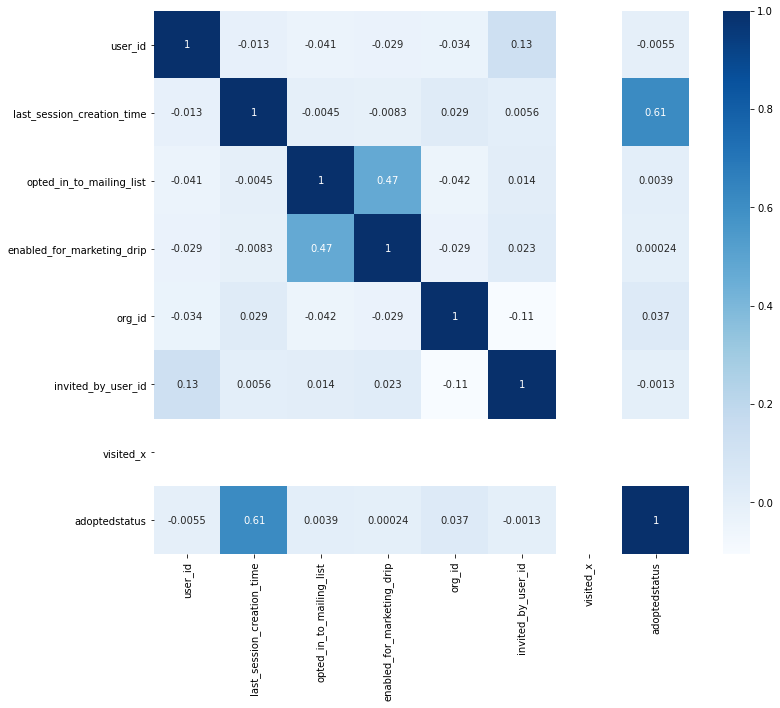

In [155]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(final.corr(), annot=True,cmap ='Blues')

In [156]:
final = final.groupby(['creation_source'])['adoptedstatus'].count()

In [157]:
display(final)

creation_source
GUEST_INVITE          46796
ORG_INVITE            70091
PERSONAL_PROJECTS     19222
SIGNUP                37545
SIGNUP_GOOGLE_AUTH    34263
Name: adoptedstatus, dtype: int64

Text(0.5, 1.0, 'Adopted Users by Creation Source')

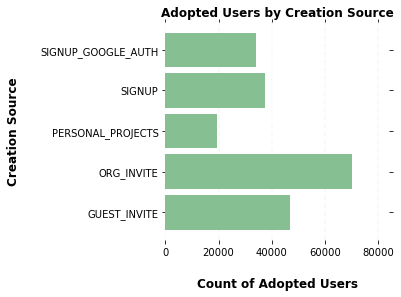

In [159]:
ax = final.plot(kind='barh', figsize=(4, 4), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Count of Adopted Users", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Creation Source", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title("Adopted Users by Creation Source", weight='bold', size=12)
